In [5]:
import os 
from dotenv import load_dotenv
env_path = r"D:\common_credentials\.env"
load_dotenv(dotenv_path=env_path)

True

In [6]:
from langchain_core.messages import HumanMessage, SystemMessage, AnyMessage
from langgraph.graph import END, START, StateGraph, add_messages
from typing import TypedDict, List, Dict, Annotated
from prompts.system_prompts import product_owner_prompt
from langchain_core.prompts import ChatPromptTemplate
from langchain_groq import ChatGroq
from IPython.display import display, Markdown

In [8]:
llm= ChatGroq(model="llama-3.2-11b-vision-preview")

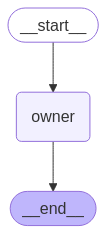

In [99]:
class State(TypedDict):
    # msg: Annotated[list[AnyMessage], add_messages]
    question: str
    documents: List[str]



# Define the product_owner function
def product_owner(state: State):
    ProdOwnSysPrompt = product_owner_prompt
    question = state["question"]
    # owner_template = ChatPromptTemplate(messages=[
    #     ("system", ProdOwnSysPrompt),
    #     ("documents", "{question}")
    # ])
    # owner_template= owner_template.invoke({"question": question})
    owner_template= ProdOwnSysPrompt + question

    response = llm.invoke(owner_template)
    return {"documents": response,
            "question": question}


# ----------- Graph Builder -----------------
builder = StateGraph(State)
# Adding nodes and edges to the builder
builder.add_node("owner", product_owner)
builder.add_edge(START, "owner")
builder.add_edge("owner", END)
graph= builder.compile()
builder.compile()


In [117]:
inputs = {
    "question": "I want application which can store the recipe, where user can login and store there own recipe."
}
for output in graph.stream(inputs):
    display(Markdown(output['owner']['documents'].content))

 

### Step 1: Understand Requirements

Based on your requirement, I'll break down the requirements into smaller, actionable tasks. 

- **Gather Requirements:**

  1. The application will store recipes.
  2. Users can login and store their own recipes.
  3. Users will have a personalized dashboard to manage their recipes.
  4. Users can search, filter, and sort recipes.
  5. Users can add, edit, and delete their own recipes.

- **Prioritize Requirements:**
  1. User authentication and authorization (login feature)
  2. Recipe storage and management (saving, editing, and deleting recipes)
  3. User dashboard and recipe listing
  4. Search, filter, and sort functionality
  5. User profile management

### Step 2: Create User Stories

Here are the user stories based on the prioritized requirements:

1. **Story 1: User Login**

   - As a user, I want to be able to login, so that I can access my account and store recipes.
   - Acceptance Criteria:
     - The user can enter their email and password to login.
     - The application checks the user's email and password against the stored data.
     - If the credentials are correct, the user is redirected to their dashboard.

2. **Story 2: User Registration**

   - As a user, I want to be able to register for an account, so that I can store recipes.
   - Acceptance Criteria:
     - The user can enter their email, password, and other required information to register.
     - The application checks for existing email addresses and ensures password requirements are met.
     - If the registration is successful, the user is redirected to the login page.

3. **Story 3: Personalized Dashboard**

   - As a user, I want to be able to access my dashboard, so that I can view and manage my recipes.
   - Acceptance Criteria:
     - The user can view their recipes, including name, description, and ingredients.
     - The user can view their saved recipes with a "Saved" status.
     - The user can delete or edit their saved recipes.

4. **Story 4: Recipe Storage and Management**

   - As a user, I want to be able to add, edit, and delete recipes, so that I can manage my cookbook.
   - Acceptance Criteria:
     - The user can add a new recipe with name, description, ingredients, and instructions.
     - The user can edit an existing recipe to update its details.
     - The user can delete a recipe from their cookbook.

5. **Story 5: Search, Filter, and Sort Functionality**

   - As a user, I want to be able to search, filter, and sort recipes, so that I can quickly find the recipes I need.
   - Acceptance Criteria:
     - The user can search recipes by name, ingredients, or tags.
     - The user can filter recipes by category, cooking time, or dietary restrictions.
     - The user can sort recipes by name, cooking time, or rating.

6. **Story 6: User Profile Management**

   - As a user, I want to be able to manage my profile information, so that I can keep my account up-to-date.
   - Acceptance Criteria:
     - The user can view and edit their profile information.
     - The user can update their password and other account settings.

### Step 3: Address Dependencies & Constraints

- **External Dependencies:**
  - The application will use a third-party API for email verification and password hashing.
  - The application will use a database to store user data and recipe information.

- **Constraints:**
  - The application must follow the standard UI/UX guidelines for login and registration pages.
  - The application must ensure password security and encryption.

### Step 4: Provide Context & Instructions

- **Background Information:**
  - The application will be a web-based platform for users to store and manage their recipes.
  - The application will be built using HTML, CSS, JavaScript, and a backend framework such as Node.js.

- **UI/UX Guidelines:**
  - The login and registration pages must follow standard UI/UX guidelines for input fields and buttons.
  - The dashboard and recipe listing pages must be visually appealing and easy to navigate.

- **Technical Notes:**
  - The application will use a RESTful API for backend communication.
  - The application will use a library such as Passport.js for authentication and authorization.

### Step 5: Prioritize & Break Down Stories

- **Prioritization:**
  - The login and registration stories have the highest priority, as they are essential for user authentication and authorization.
  - The recipe storage and management stories have the next highest priority, as they are essential for user functionality.

- **Breaking Down Stories:**
  - Story 1 (User Login) can be broken down into smaller tasks such as handling user input, checking credentials, and redirecting to the dashboard.
  - Story 2 (User Registration) can be broken down into smaller tasks such as handling user input, checking for existing email addresses, and redirecting to the login page.

### Step 6: Communicate & Collaborate

- **Team Communication:**
  - The team will communicate through regular meetings and stand-ups to ensure everyone is on the same page.
  - The team will use collaboration tools such as Trello or Asana to track progress and assign tasks.

- **Stakeholder Communication:**
  - The stakeholders will be kept informed through regular updates and demos.
  - The stakeholders will be involved in the testing and validation process to ensure the application meets their requirements.

### Step 7: Review & Iterate

- **Review Process:**
  - The team will review the completed stories with stakeholders to gather feedback and identify areas for improvement.
  - The team will iterate on the stories to address any issues or concerns.

- **Iteration:**
  - The team will iterate on the stories to ensure they meet the requirements and are testable.
  - The team will refine the stories to ensure they are clear and concise.

# Another way

In [11]:
class graphstate(TypedDict):
    msg: Annotated[list[AnyMessage], add_messages]

In [33]:
def product_owner(state: graphstate):
    template= ChatPromptTemplate([
        ("system", product_owner_prompt),
        ("human", "{user_input}")
    ])
    user_input= state['msg']
    completed_template= template.invoke({"user_input": user_input})
    response = llm.invoke(completed_template)
    return {"msg":[response]}
    
#create Graph 
builder= StateGraph(graphstate)
builder.add_node("owner", product_owner)
builder.add_edge(START, "owner")
builder.add_edge("owner", END)
graph= builder.compile()

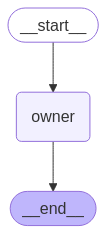

In [34]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [48]:
input_= [HumanMessage(content="I wan to create app where user can store his recepie")]
for event in graph.stream({'msg': input_ }):
    print(event['owner']['msg'][0].content)

Based on the provided user requirement, I will follow the steps to prepare user stories for the development team.

### Step 1: Understand Requirements

**Requirement**: The user wants to create an app where they can store their recipes.

**Clarification Needed**: We need to understand what features the user expects from the app. Some questions to ask:
- Can users browse through stored recipes?
- Can users add new recipes?
- Can users edit or delete existing recipes?
- Are there any specific fields or features users want in their stored recipes (e.g., images, tags, etc.)?
- Are there any specific requirements for user authentication or authorization?

### Step 2: Create User Stories

Based on the clarification, let's create the following user stories:

#### Story 1: Add Recipe

*As a user, I want to add a new recipe to my collection, so that I can organize and easily access my favorite recipes.*

#### Story 2: View Stored Recipes

*As a user, I want to be able to browse through the reci

In [49]:
# Input msg
input_= [HumanMessage(content="I wan to create app where user can store his recepie")]
output= graph.invoke({'msg': input_ })
for m in output['msg']:
    m.pretty_print()


================================ Human Message =================================

I wan to create app where user can store his recepie
================================== Ai Message ==================================

### User Requirements Analysis

Based on the provided user requirement, "I want to create an app where users can store their recipes," let's break down the requirements into actionable user stories.

#### User Story 1: Recipe Creation

* **As a** user, **I want to** be able to create a new recipe, **so that** I can store and organize my recipes.
	+ Acceptance Criteria:
		- The user can input the recipe name, ingredients, and instructions.
		- The user can upload a recipe image.
		- The user can save the recipe and view it on the app.
	+ Dependencies & Constraints: Ensure that the app has a secure way to store user data, including recipe images.
	+ Context & Instructions: The app should provide UI/UX guidelines for users to input and save recipes. Consider implementing a st

================================ Human Message =================================

I wan to create app where user can store his recepie
================================== Ai Message ==================================

### User Requirements: 

You want to create an app where users can store their recipes. This involves creating a digital platform where users can save, organize, and manage their favorite recipes.

### Step 1: Understand Requirements

- **Gather Requirements:**
  - The app should allow users to save recipes with ingredients, instructions, and nutritional information.
  - Users should be able to organize recipes into categories (e.g., breakfast, lunch, dinner).
  - The app should provide a search functionality to easily find specific recipes.
  - Users should be able to add and manage their personal cooking notes.

- **Clarify Ambiguities:**
  - Will the app allow users to create new recipes from scratch or only save existing ones?
  - Will the app integrate with any popula

In [40]:
output['msg']

[HumanMessage(content='I wan to create app where user can store his recepie', additional_kwargs={}, response_metadata={}, id='1e7469c6-a2b7-4f90-ab26-b7b9728900f4'),
 AIMessage(content="### User Requirements: \n\nYou want to create an app where users can store their recipes. This involves creating a digital platform where users can save, organize, and manage their favorite recipes.\n\n### Step 1: Understand Requirements\n\n- **Gather Requirements:**\n  - The app should allow users to save recipes with ingredients, instructions, and nutritional information.\n  - Users should be able to organize recipes into categories (e.g., breakfast, lunch, dinner).\n  - The app should provide a search functionality to easily find specific recipes.\n  - Users should be able to add and manage their personal cooking notes.\n\n- **Clarify Ambiguities:**\n  - Will the app allow users to create new recipes from scratch or only save existing ones?\n  - Will the app integrate with any popular recipe APIs or 

In [39]:
output

{'msg': [HumanMessage(content='I wan to create app where user can store his recepie', additional_kwargs={}, response_metadata={}, id='1e7469c6-a2b7-4f90-ab26-b7b9728900f4'),
  AIMessage(content="### User Requirements: \n\nYou want to create an app where users can store their recipes. This involves creating a digital platform where users can save, organize, and manage their favorite recipes.\n\n### Step 1: Understand Requirements\n\n- **Gather Requirements:**\n  - The app should allow users to save recipes with ingredients, instructions, and nutritional information.\n  - Users should be able to organize recipes into categories (e.g., breakfast, lunch, dinner).\n  - The app should provide a search functionality to easily find specific recipes.\n  - Users should be able to add and manage their personal cooking notes.\n\n- **Clarify Ambiguities:**\n  - Will the app allow users to create new recipes from scratch or only save existing ones?\n  - Will the app integrate with any popular recipe

In [28]:
# template= ChatPromptTemplate([
#         ("system", product_owner_prompt),
#         ("human", "{user_input}")
#     ])
# chain = template | llm 
# chain.invoke({"user_input" :"I wan to create app where user can store his recepie"})


In [26]:
# llm.invoke(template.invoke({"user_input" :"I wan to create app where user can store his recepie"}))

In [22]:
# template = ChatPromptTemplate([
#     ("system", "You are a helpful AI bot. Your name is Carl."),
#     ("human", "{user_input}"),
# ])
# prompt_value = template.invoke("Hello, there!")
# prompt_value

In [25]:
chain= template | llm
chain.invoke("Hi there")

AIMessage(content="Hello! I'm Carl, your friendly AI assistant. How can I help you today? Do you have any questions or topics you'd like to discuss? I'm here to provide information, answer questions, and have a chat. What's on your mind?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 53, 'prompt_tokens': 49, 'total_tokens': 102, 'completion_time': 0.070666667, 'prompt_time': 0.004010494, 'queue_time': 1.225581023, 'total_time': 0.074677161}, 'model_name': 'llama-3.2-11b-vision-preview', 'system_fingerprint': 'fp_b457b52f3c', 'finish_reason': 'stop', 'logprobs': None}, id='run-b9a0fc54-da65-43e3-b5fc-eb3745f9b9b2-0', usage_metadata={'input_tokens': 49, 'output_tokens': 53, 'total_tokens': 102})

In [26]:
chain.invoke({"user_input": "Hi there"})

AIMessage(content="Hello.  My name is Carl, and I'm here to help answer any questions you may have or provide information on a wide range of topics. How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 38, 'prompt_tokens': 49, 'total_tokens': 87, 'completion_time': 0.050666667, 'prompt_time': 0.003610843, 'queue_time': 0.223583443, 'total_time': 0.05427751}, 'model_name': 'llama-3.2-11b-vision-preview', 'system_fingerprint': 'fp_465c5d391d', 'finish_reason': 'stop', 'logprobs': None}, id='run-1cd049c1-4b5d-49b6-924c-7719ac7cdf56-0', usage_metadata={'input_tokens': 49, 'output_tokens': 38, 'total_tokens': 87})

# RAW Input

In [56]:
ProdOwnSysPrompt = product_owner_prompt
owner_template = ChatPromptTemplate(messages=[
    ("system", ProdOwnSysPrompt),
    ("user", "{Question}")
])
template= owner_template.invoke({"Question": "I want application which can store the recipe, where user can login and store there own recipe."})
response= llm.invoke(template)

In [59]:
display(Markdown(response.content))

**User Requirements:**

- A user should be able to create an account and log in to the application.
- A user should be able to store their own recipes in the application.
- A user should be able to view their stored recipes in the application.
- The application should allow users to add, edit, and delete recipes.
- The application should have a user-friendly interface for users to input recipe details.

**Step 1: Understand Requirements**

To clarify the user requirements, let's break down the functionality into smaller components:

1. User authentication (login and registration)
2. Recipe storage and management (create, edit, delete)
3. User interface for recipe input

**Step 2: Create User Stories**

Based on the user requirements, here are some user stories:

1. **US-1: User Registration**
   *As a user, I want to be able to create an account, so that I can store my recipes.*

2. **US-2: User Login**
   *As a user, I want to be able to log in to my account, so that I can access my stored recipes.*

3. **US-3: Add Recipe**
   *As a user, I want to be able to add new recipes to my account, so that I can store my favorite recipes.*

4. **US-4: View Recipes**
   *As a user, I want to be able to view all my stored recipes, so that I can easily access them.*

5. **US-5: Edit Recipe**
   *As a user, I want to be able to edit my stored recipes, so that I can update the recipe details.*

6. **US-6: Delete Recipe**
   *As a user, I want to be able to delete my stored recipes, so that I can remove unwanted recipes.*

**Step 3: Define Acceptance Criteria**

For each user story, here are some acceptance criteria:

1. **US-1: User Registration**
   - The application should allow users to create an account with a unique username and password.
   - The application should validate user input and display error messages for invalid input.

2. **US-2: User Login**
   - The application should allow users to log in with their username and password.
   - The application should validate user input and display error messages for invalid input.

3. **US-3: Add Recipe**
   - The application should allow users to add new recipes with details such as name, ingredients, and instructions.
   - The application should validate user input and display error messages for invalid input.

4. **US-4: View Recipes**
   - The application should display all stored recipes in a user-friendly format.
   - The application should allow users to filter or search recipes by name or category.

5. **US-5: Edit Recipe**
   - The application should allow users to edit stored recipes with details such as name, ingredients, and instructions.
   - The application should validate user input and display error messages for invalid input.

6. **US-6: Delete Recipe**
   - The application should allow users to delete stored recipes.
   - The application should confirm deletion with the user before deleting the recipe.

**Step 4: Address Dependencies & Constraints**

Based on the user requirements, here are some dependencies and constraints:

- The application should use a secure password hashing algorithm to store user passwords.
- The application should use a reliable database to store user data and recipes.
- The application should have a user-friendly interface for users to input recipe details.

**Step 5: Provide Context & Instructions**

Based on the user requirements, here are some additional context and instructions:

- The application should have a clean and intuitive user interface.
- The application should provide clear instructions for users to follow when adding, editing, or deleting recipes.
- The application should handle errors and exceptions gracefully.

**Step 6: Prioritize & Break Down Stories**

Based on the user requirements, here are some prioritization and breakdown of stories:

- Priority 1: User registration and login (US-1 and US-2)
- Priority 2: Add recipe (US-3)
- Priority 3: View recipes (US-4)
- Priority 4: Edit recipe (US-5)
- Priority 5: Delete recipe (US-6)

**Step 7: Communicate & Collaborate**

Based on the user requirements, here are some communication and collaboration:

- The development team should work closely with stakeholders to clarify any ambiguities.
- The development team should provide regular updates to stakeholders on the progress of the application.
- The development team should gather feedback from stakeholders and iterate accordingly.

**Step 8: Review & Iterate**

Based on the user requirements, here are some review and iteration:

- The development team should review the completed application with stakeholders.
- The development team should gather feedback from stakeholders and iterate accordingly.
- The development team should ensure that the application meets the user requirements and is user-friendly.